In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [3]:
#load Data sets
train = pd.read_csv("./houseprices/train.csv")
test = pd.read_csv("./houseprices/test.csv")

In [4]:
print("Train dataset shape",train.shape)
print("Test dataset shape",test.shape)
# test.csv dataset dosent have final salePrice.This is our Target Variable
#Train dataset shape (1460, 81)
#Test dataset shape (1459, 80)

Train dataset shape (1460, 81)
Test dataset shape (1459, 80)


In [5]:
#looking at few rows
print(train.head(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [6]:
#to find mean,std,min,max of the numerical columns in the train dataset.
print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [7]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#How many columns with different datatypes are there?
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

C:\Users\saich\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


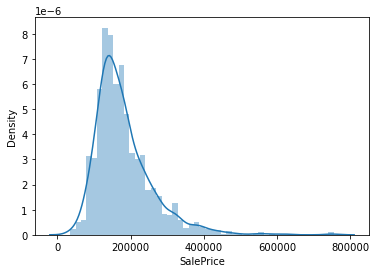

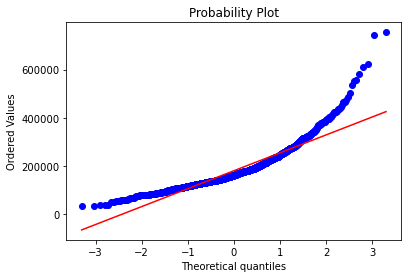

In [9]:
#Distribution of SalePrice
sns.distplot(train['SalePrice']);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [10]:
#The distribution of the SalePrice is not normal.
#It is right skewed and dosent follow the standard line.

print("Skew of SalePrice : ",train['SalePrice'].skew())
print("Kurtosis of SalePrice : ",train['SalePrice'].kurt())

Skew of SalePrice :  1.8828757597682129
Kurtosis of SalePrice :  6.536281860064529


C:\Users\saich\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


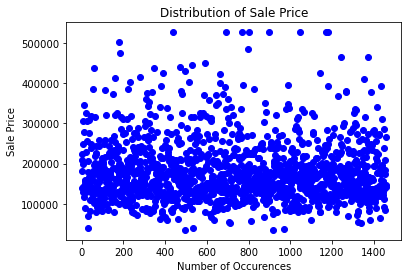

In [11]:
#There are some Outliers due to which the kurtosis value is far greater than the ideal value of 3.

upperlimit = np.percentile(train.SalePrice.values, 99.5)
train['SalePrice'].loc[train['SalePrice']>upperlimit] = upperlimit

plt.scatter(range(train.shape[0]), train["SalePrice"].values,color='blue')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price");

C:\Users\saich\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


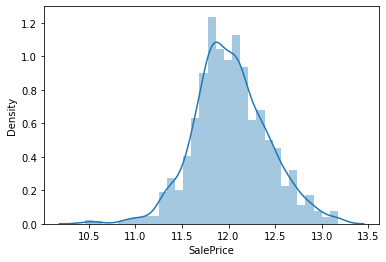

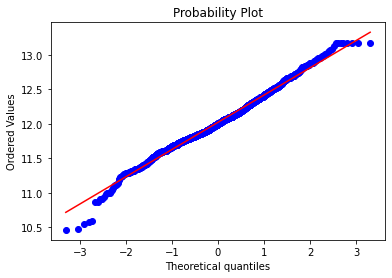

In [15]:
#Trasnforming the target variable by taking log scale.
target = np.log(train['SalePrice'])
sns.distplot(target)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

In [16]:
print("Skew of SalePrice : ",train['GrLivArea'].skew())
print("Kurtosis of SalePrice : ",train['GrLivArea'].kurt())

Skew of SalePrice :  1.3665603560164552
Kurtosis of SalePrice :  4.895120580693174


C:\Users\saich\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


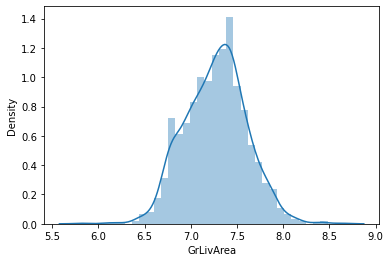

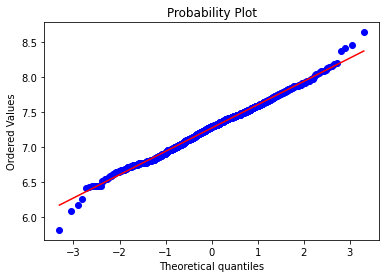

In [17]:
target = np.log(train['GrLivArea'])
sns.distplot(target)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

In [18]:
#To find numerical features.
num_data = train.select_dtypes(include=[np.number])

#To find categorrical features.
categoricals = train.select_dtypes(exclude=[np.number])

#No of numerical and categorical features.
print('There are {0} numerical and {1} categorical features in Train Dataset'.\
      format(num_data.shape[1],categoricals.shape[1]))

There are 38 numerical and 43 categorical features in Train Dataset


In [19]:

#to find mean,std,min,max of SalePrice in train dataset
print(num_data.SalePrice.describe())

count      1460.000000
mean     180407.144055
std       76627.258585
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      527331.915000
Name: SalePrice, dtype: float64


In [20]:
# To find correlation between SalePrice and Other variables
corr = num_data.corr()

In [21]:
#Finding Correlation with SalePrice as a table and sorted.
corr_sp = num_data.corr()['SalePrice']
corr_sp[np.argsort(corr_sp, axis = 0)[::-1]]

SalePrice        1.000000
OverallQual      0.802340
GrLivArea        0.705461
GarageCars       0.652863
GarageArea       0.635267
TotalBsmtSF      0.617219
1stFlrSF         0.609000
FullBath         0.565595
TotRmsAbvGrd     0.537596
YearBuilt        0.536054
YearRemodAdd     0.521082
GarageYrBlt      0.499518
MasVnrArea       0.473873
Fireplaces       0.472321
BsmtFinSF1       0.384035
LotFrontage      0.349992
WoodDeckSF       0.328965
OpenPorchSF      0.324571
2ndFlrSF         0.312753
HalfBath         0.286800
LotArea          0.267056
BsmtFullBath     0.233419
BsmtUnfSF        0.220300
BedroomAbvGr     0.167521
ScreenPorch      0.114528
PoolArea         0.069365
MoSold           0.053503
3SsnPorch        0.047002
BsmtFinSF2      -0.010686
MiscVal         -0.021380
BsmtHalfBath    -0.024375
LowQualFinSF    -0.025740
Id              -0.025960
YrSold          -0.028048
OverallCond     -0.079075
MSSubClass      -0.086926
EnclosedPorch   -0.130890
KitchenAbvGr    -0.139482
Name: SalePr

In [22]:
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.802340
GrLivArea      0.705461
GarageCars     0.652863
GarageArea     0.635267
Name: SalePrice, dtype: float64 

YrSold          -0.028048
OverallCond     -0.079075
MSSubClass      -0.086926
EnclosedPorch   -0.130890
KitchenAbvGr    -0.139482
Name: SalePrice, dtype: float64


Text(0.5, 1.0, 'Correlation between features.')

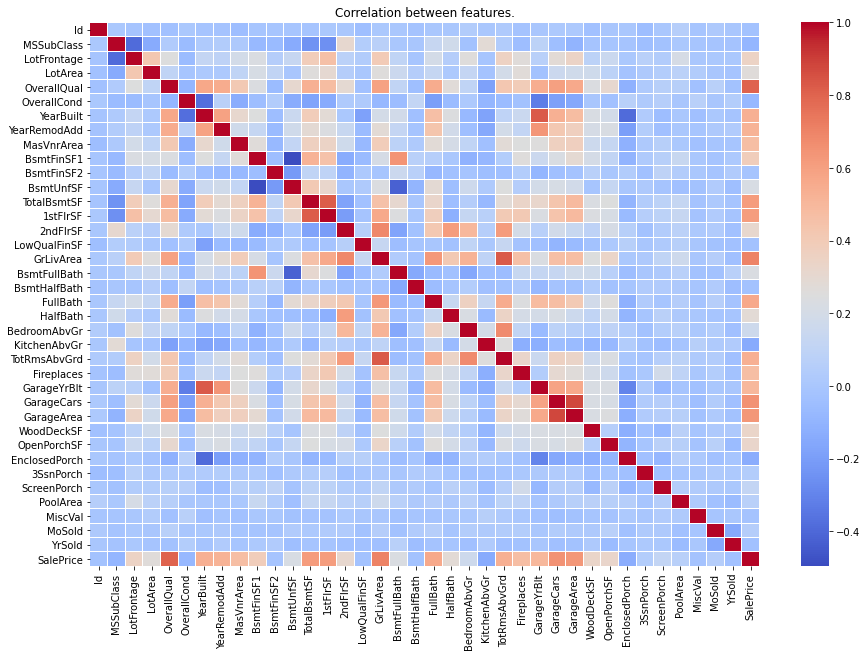

In [23]:
#Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr, linewidths=0.01,cmap="coolwarm")
plt.title('Correlation between features.')

In [24]:

#Warm colors more dependency
#Cool colors less to no dependency

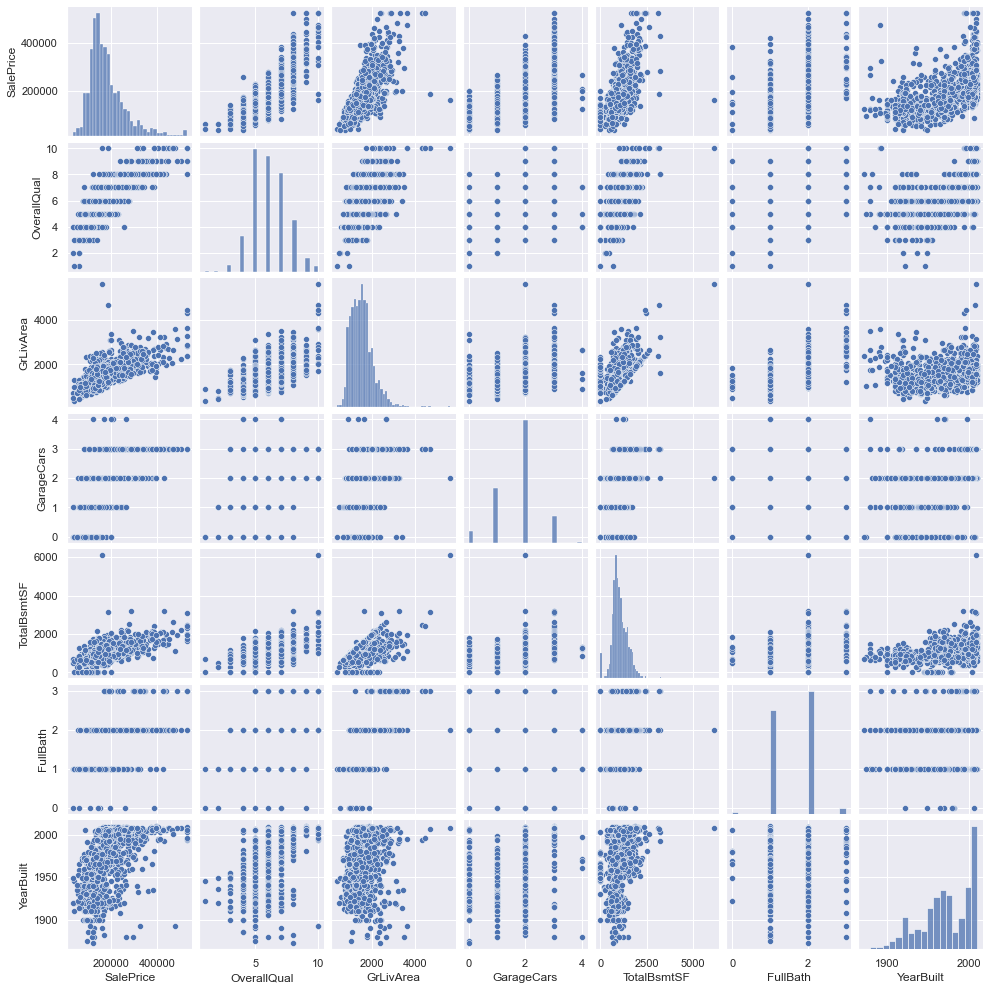

In [25]:
#scatterplots between 'SalePrice' and all the correlated variables.
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2)
plt.show();

In [26]:
# Relation Between Overall Quality and SalePrice.
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

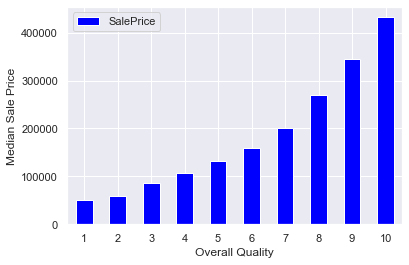

In [27]:
# Visualisation of Relation Between Overall Quality and SalePrice.
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

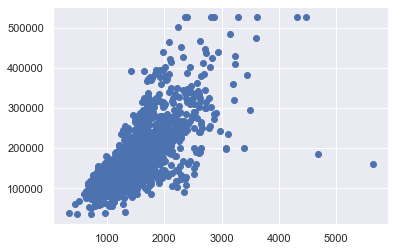

In [28]:
plt.scatter(train.GrLivArea, train.SalePrice)

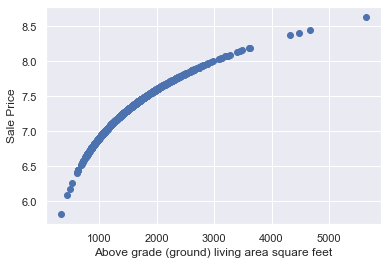

In [29]:
# Visualisation of relationship between the Ground Living Area(GrLivArea) and SalePrice.

plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

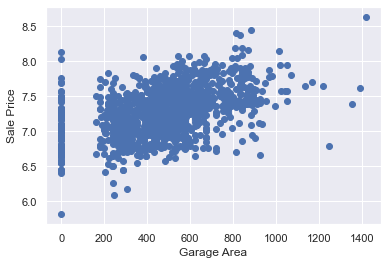

In [30]:

# Visualisation of relationship between the GarageArea and SalePrice.
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [31]:
# create a new dataframe with some outliers removed
train = train[train['GarageArea'] < 1200]

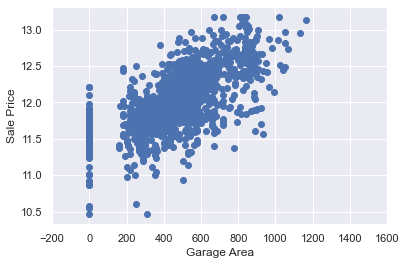

In [32]:
# display the previous graph again without outliers
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)     # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


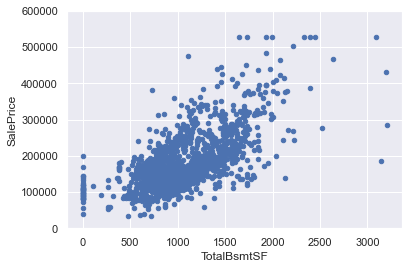

In [33]:

# Visualisation of relationship between saleprice and grlivarea.
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,600000));

C:\Users\saich\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


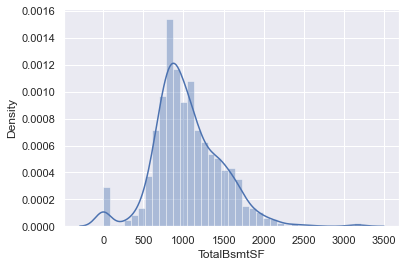

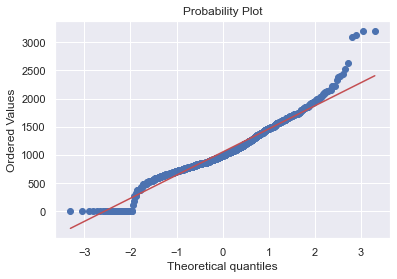

In [34]:
#histogram and normal probability plot for TotalBsmtSF.
sns.distplot(train['TotalBsmtSF']);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

C:\Users\saich\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


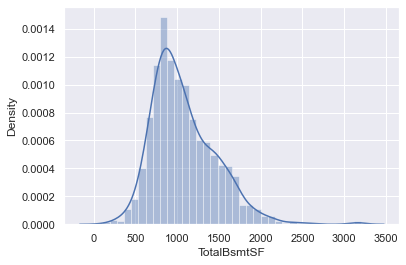

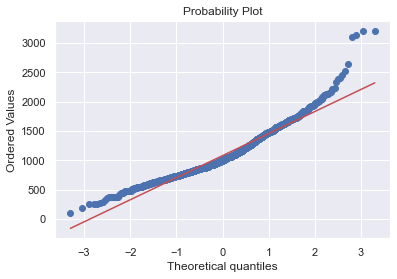

In [35]:

# TotlaBsmtSF, Visualising histogram and normal probability plot.
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF']);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [36]:

# To view the most null columns and return the counts of the null values in each column
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls
print(nulls)

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


<AxesSubplot:title={'center':'Time of the Year the property was sold'}, xlabel='YrSold,MoSold'>

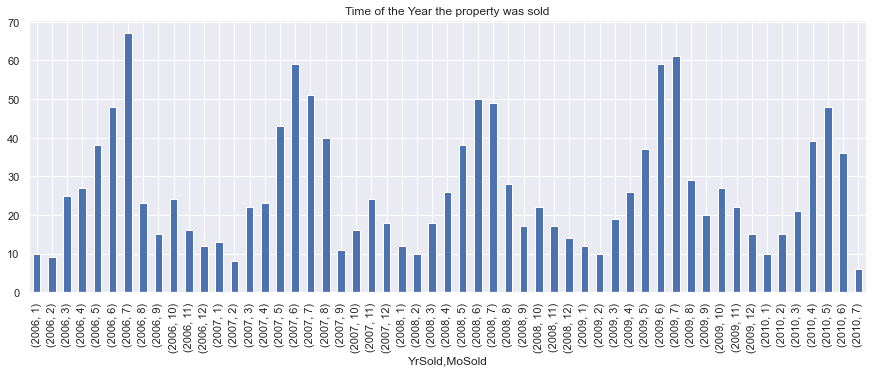

In [37]:
#Plotting the time of sale during a year
plt.title("Time of the Year the property was sold")
train.groupby(['YrSold', 'MoSold']).Id.count().plot(kind ='bar',figsize = (15,5))

<AxesSubplot:title={'center':'Where the properties are located'}, xlabel='Neighborhood'>

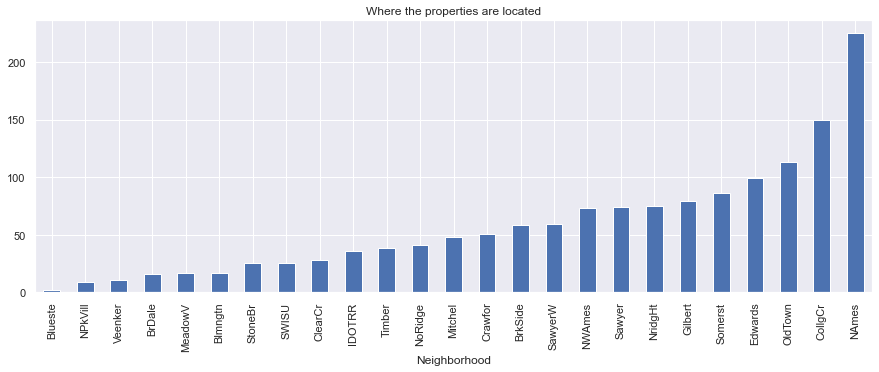

In [38]:
#Where the properties are located
plt.title("Where the properties are located")
train.groupby(['Neighborhood']).Id.count().sort_values().plot(kind ='bar',figsize = (15,5))

In [39]:
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA      

In [40]:

# By using one-hot encoding to transform the data into a Boolean column.
# Pave and Grvl values converted into 1 and 0
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

In [41]:
print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


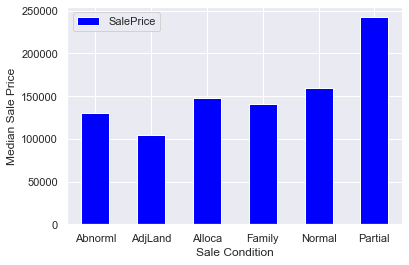

In [42]:
# SaleCondition by constructing and plotting a pivot table, as we did above for OverallQual
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [43]:
# encode this SaleCondition as a new feature by using a similar method that we used for Street above
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

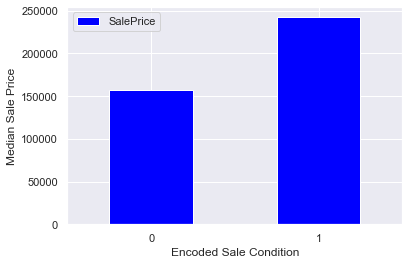

In [44]:
# Visualising Sale Condition after encoding.
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [45]:

#   We'll fill the missing values with an average value and then assign the results to data          #
#   This is a method of interpolation     
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [46]:

# Check if the all of the columns have 0 null values.
print(sum(data.isnull().sum() != 0))


0


In [47]:

# To separate the features and the target variable for modeling.
# We will assign the features to X and the target variable(Sales Price)to y.
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [48]:
# Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before.
# If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

#random_state=42

In [49]:

# Creating an instance of linear regression model.
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
lr = linear_model.LinearRegression()
rf_model = RandomForestRegressor()

In [50]:
# Fitting the Linear Reggressor Model
model = lr.fit(X_train, y_train)

In [51]:
# To Evaluate the performance and visualize results
# r-squared value is a measure of how close the data are to the fitted regression line
# a higher r-squared value means a better fit(very close to value 1)
print("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.891704485019033


In [52]:
# Fitting Random Forest Reggressor Model.
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
print("R^2 is: \n", rf_model.score(X_test, y_test))

R^2 is: 
 0.870586701428778


In [54]:
# Using the model we built to make predictions on the test data set.
predictions = model.predict(X_test)
predictions2 = rf_model.predict(X_test)

In [55]:
# To find out the Mean Squared Error.
from sklearn.metrics import mean_squared_error
print('Mean Squared Error of Linear Model: ', mean_squared_error(y_test,predictions))
print('Mean Squared Error of Random Forest: ', mean_squared_error(y_test,predictions2))

Mean Squared Error of Linear Model:  0.017719952128757044
Mean Squared Error of Random Forest:  0.02117536867440565


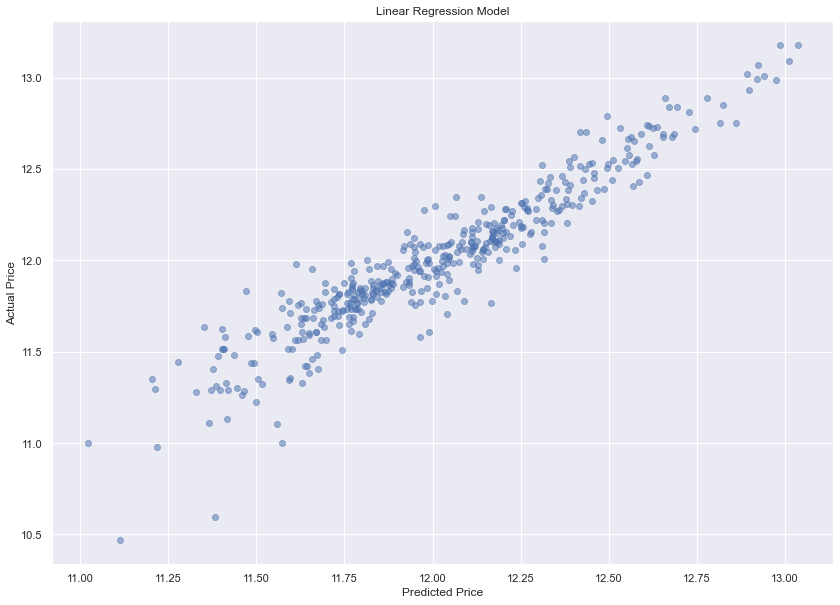

In [56]:
# Graphically representing predections and the actual prices.
actual_values = y_test
plt.figure(figsize=(14,10))
plt.scatter(predictions, actual_values, alpha=.5) # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

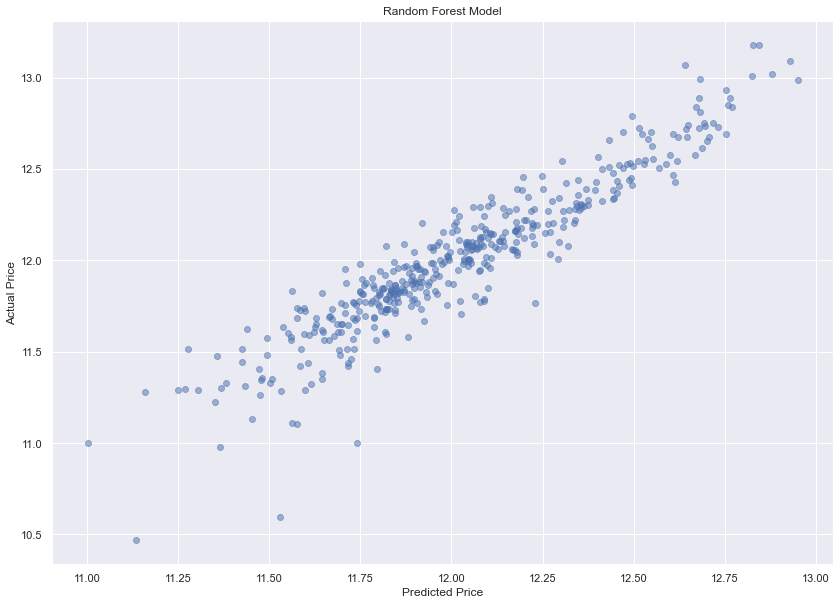

In [57]:
# Graphically representing predections and the actual prices.
actual_values = y_test
plt.figure(figsize=(14,10))
plt.scatter(predictions2, actual_values, alpha=.5) # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest Model')
plt.show()

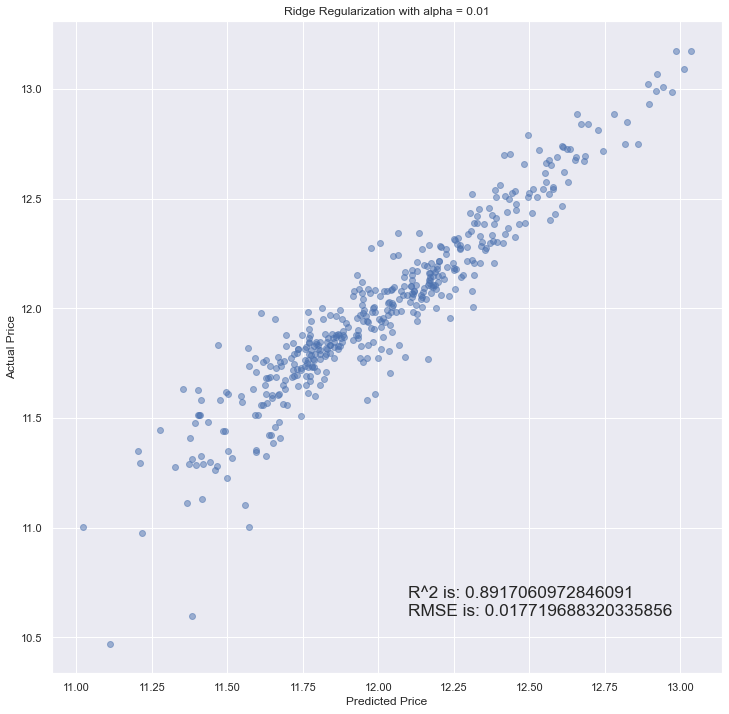

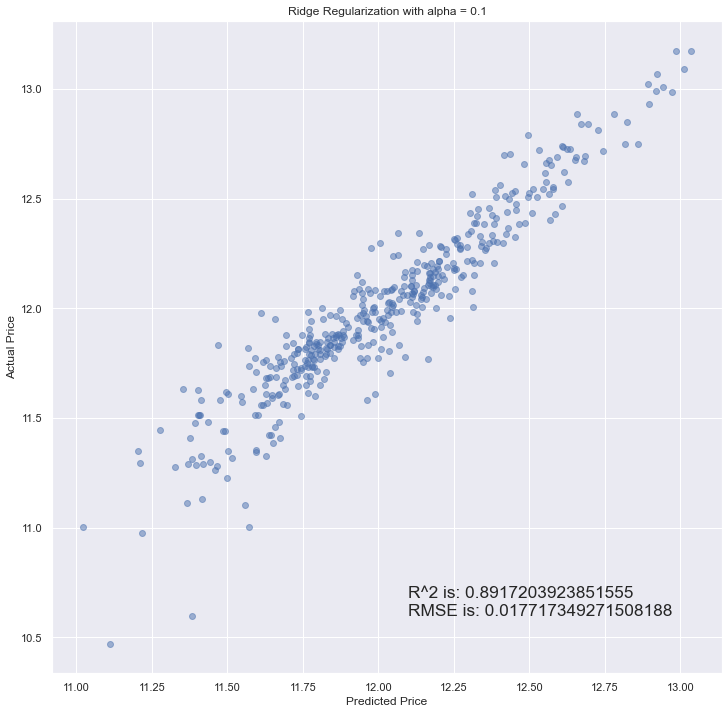

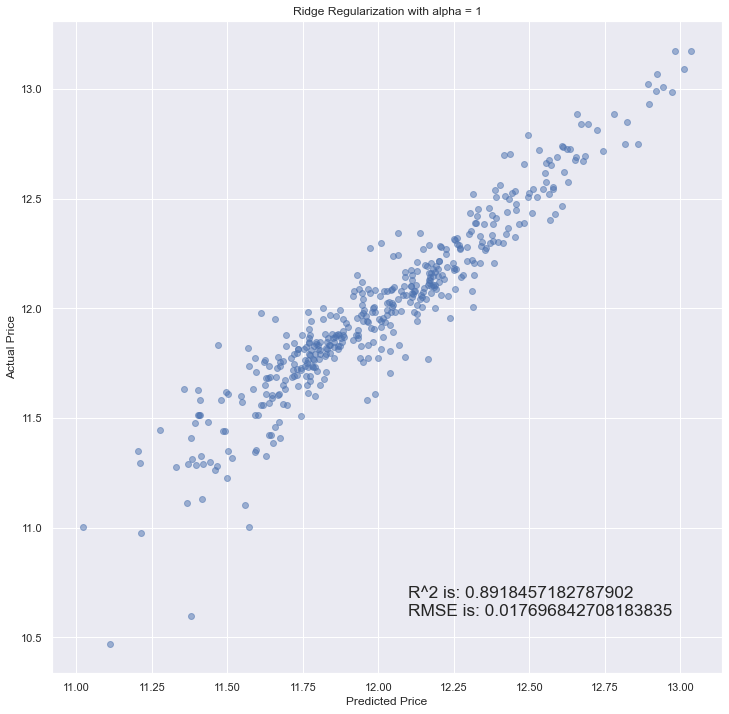

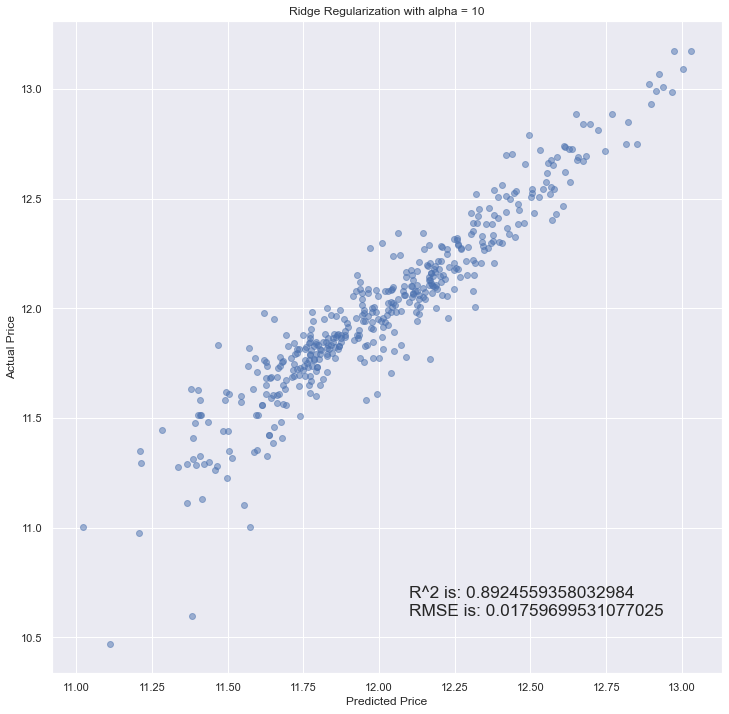

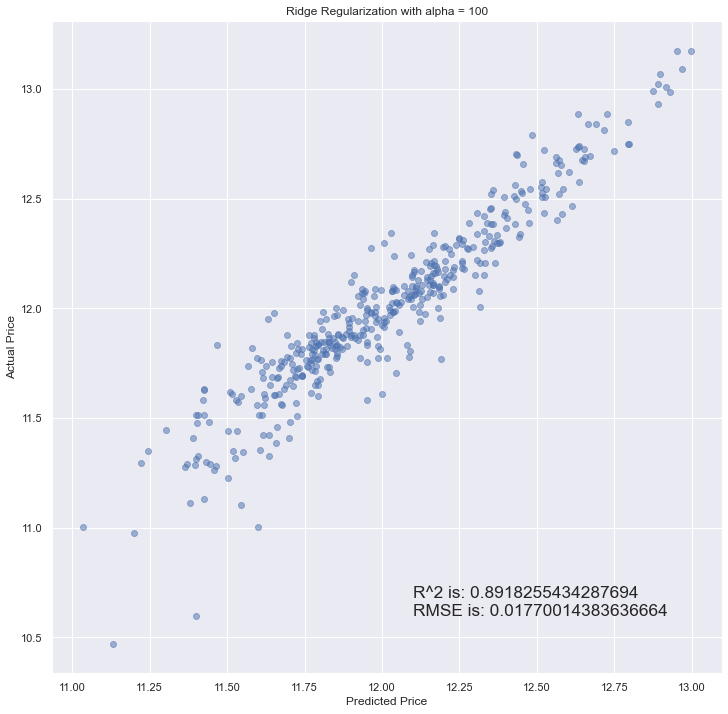

In [59]:
# To improve the model using ridge regularisation.
# This is used to reduce the infuluence of less important features.
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.figure(figsize=(12,12))
    plt.scatter(preds_ridge, actual_values, alpha=.5, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    
    plt.annotate(text=overlay,xy=(12.1,10.6),size='x-large')

In [60]:

print("R^2 for Linear Model :", model.score(X_test, y_test))

R^2 for Linear Model : 0.891704485019033


In [61]:

print("R^2 for Random Forest Model : ",rf_model.score(X_test,y_test))

R^2 for Random Forest Model :  0.870586701428778


In [62]:
# Making a Submission.
submission = pd.DataFrame()

In [63]:
submission['Id'] = test.Id

In [64]:
# Selecting features from the test dataset.
features = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [65]:
# To generate predictions.
predictions = model.predict(features)
predictions2 = rf_model.predict(features)

In [66]:
print('Linear Reggressor : \n',predictions)
print('Random Forest Reggressor : \n',predictions2)

Linear Reggressor : 
 [11.7419468  11.90549437 12.06300354 ... 12.14763167 11.66092803
 12.37494962]
Random Forest Reggressor : 
 [11.74404599 11.96361962 12.06574907 ... 11.96696516 11.62385474
 12.41310871]


In [67]:

#transforming predictions from log to exp.
final_pred = np.exp(predictions)
final_pred2 = np.exp(predictions2)

In [68]:
print('Random Forest Regression Model : ')
print('Origional Pred : \n',(predictions2)[:10],"\n")
print('Final Pred : \n',final_pred2[:10])

Random Forest Regression Model : 
Origional Pred : 
 [11.74404599 11.96361962 12.06574907 12.14299888 12.19590492 12.11356414
 12.00173128 12.06193285 12.13657039 11.72342081] 

Final Pred : 
 [126001.10981858 156940.12190903 173815.39538024 187774.84227556
 197976.75744324 182328.29105894 163036.80994263 173153.34265527
 186571.60611039 123428.93115748]


In [69]:
print('Linear Regression Model : ')
print('Origional Pred : \n',predictions[:10],"\n")
print('Final Pred : \n',final_pred[:10])

Linear Regression Model : 
Origional Pred : 
 [11.7419468  11.90549437 12.06300354 12.19222941 12.0944316  12.06824283
 12.17148117 12.02250521 12.18209511 11.68529557] 

Final Pred : 
 [125736.88642728 148077.98894008 173338.83410429 197250.42754817
 178873.04803867 174249.389834   193199.99331868 166459.14873012
 195261.52765462 118811.74859775]


In [70]:
#Assigining these predictions and checking.
submission['SalePrice'] = final_pred2

In [71]:
print(submission)

        Id      SalePrice
0     1461  126001.109819
1     1462  156940.121909
2     1463  173815.395380
3     1464  187774.842276
4     1465  197976.757443
...    ...            ...
1454  2915   80341.717676
1455  2916   88625.632091
1456  2917  157466.049902
1457  2918  111731.587899
1458  2919  246005.386329

[1459 rows x 2 columns]
